In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.axisgrid")


In [3]:
df8=sns.load_dataset('titanic')
df8

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df8.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df8.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df8['age'] = df8['age'].fillna(int(df8['age'].mean())).astype('int')
df8['embarked'] = df8['embarked'].fillna(df8['embarked'].mode()[0])
df8['embark_town'] = df8['embark_town'].fillna(df8['embark_town'].mode()[0])

df8['deck'] = df8['deck'].astype('object')  # Fill missing values as 'Unknown' with dtype 'object'
df8['deck'] = df8['deck'].fillna('Unknown')
df8.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

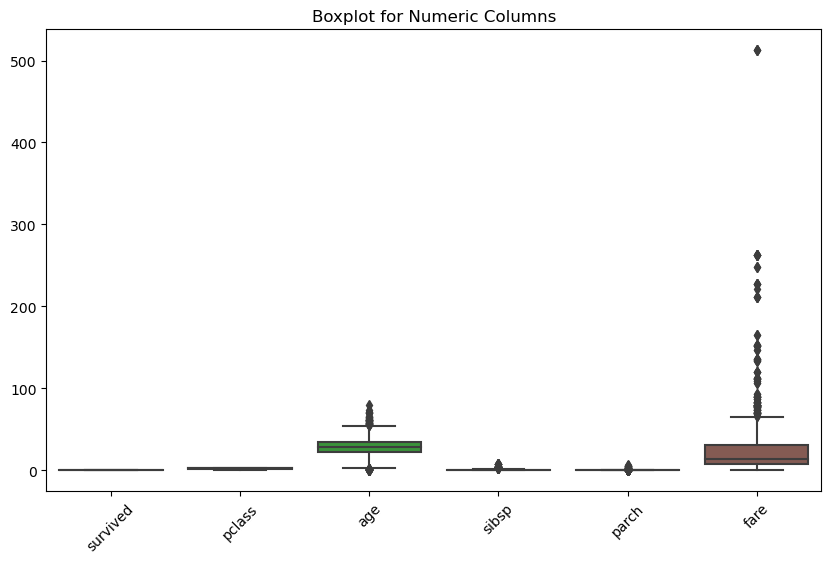

In [19]:
numeric_columns=['survived',	'pclass',	'age',	'sibsp',	'parch',	'fare']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df8[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [20]:
Q1 = df8[numeric_columns].quantile(0.25)
Q3 = df8[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (df8[numeric_columns] < lower_bound) | (df8[numeric_columns] > upper_bound)

df8_no_outliers = df8[~outlier_mask.any(axis=1)]

print("Dataset before outlier removal:", df8.shape)
print("Dataset after outlier removal:", df8_no_outliers.shape)

Dataset before outlier removal: (891, 15)
Dataset after outlier removal: (577, 15)


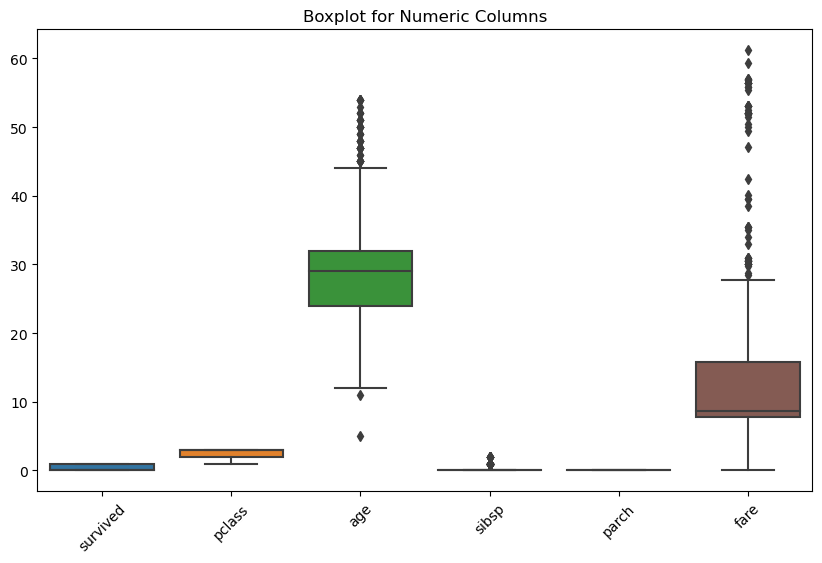

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df8_no_outliers[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns=['survived','pclass','age','sibsp','parch','fare']
scaler = MinMaxScaler()
df8[numeric_columns] = scaler.fit_transform(df8[numeric_columns])
df8[numeric_columns].head() 

,survived,pclass,age,sibsp,parch,fare
0,0.0,1.0,0.2750,0.125,0.0,0.014151
1,1.0,0.0,0.4750,0.125,0.0,0.139136
2,1.0,1.0,0.3250,0.000,0.0,0.015469
3,1.0,0.0,0.4375,0.125,0.0,0.103644
4,0.0,1.0,0.4375,0.000,0.0,0.015713


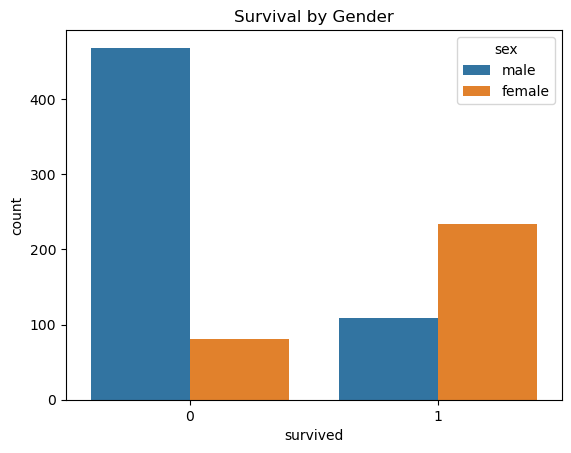

In [8]:
sns.countplot(x='survived', hue='sex', data=df8)
plt.title('Survival by Gender')
plt.show()

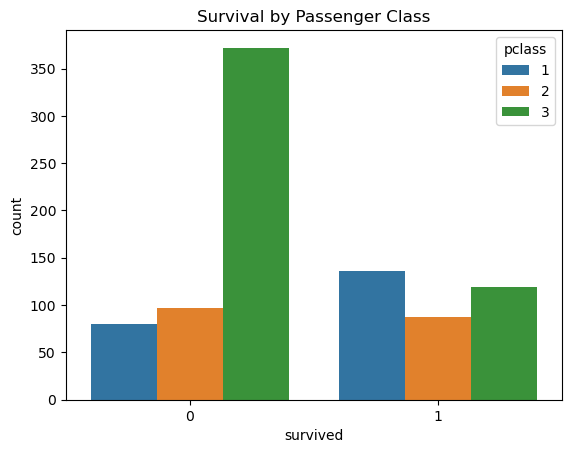

In [9]:
sns.countplot(x='survived', hue='pclass', data=df8)
plt.title('Survival by Passenger Class')
plt.show()

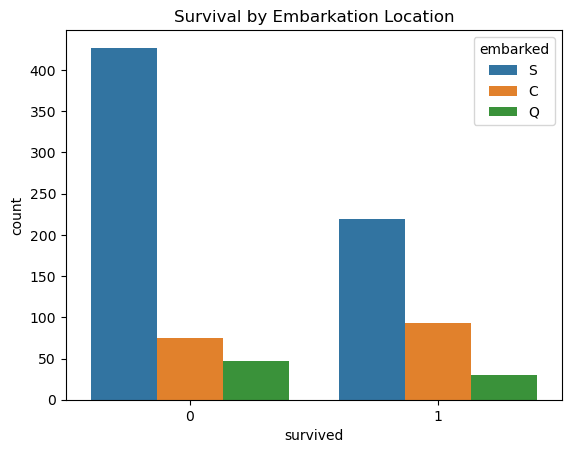

In [10]:
sns.countplot(x='survived', hue='embarked', data=df8)
plt.title('Survival by Embarkation Location')
plt.show()

<Axes: xlabel='sex', ylabel='age'>

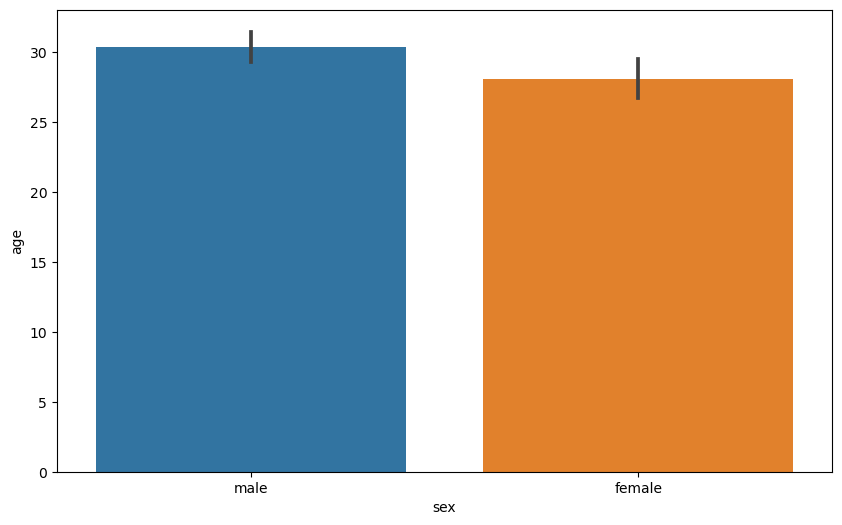

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='age', data=df8)


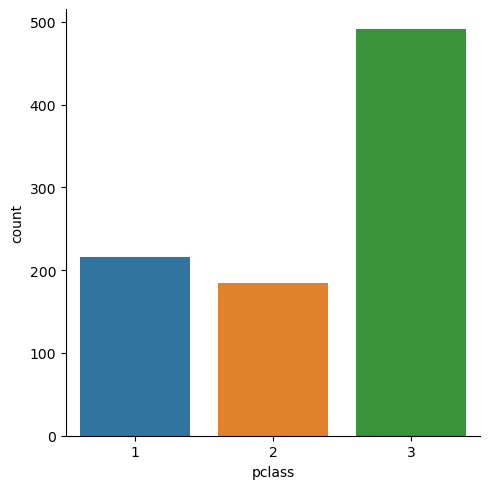

In [12]:
sns.catplot(x="pclass",data=df8, kind='count')

<Axes: xlabel='age', ylabel='fare'>

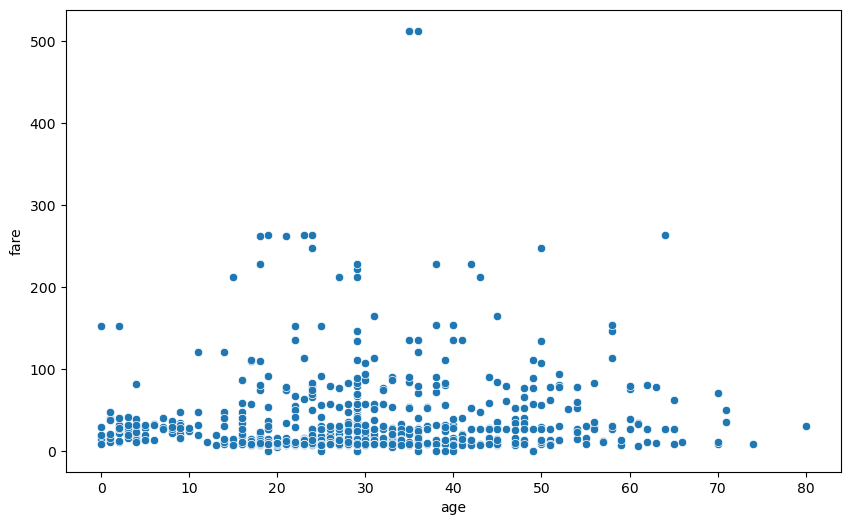

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', data=df8)


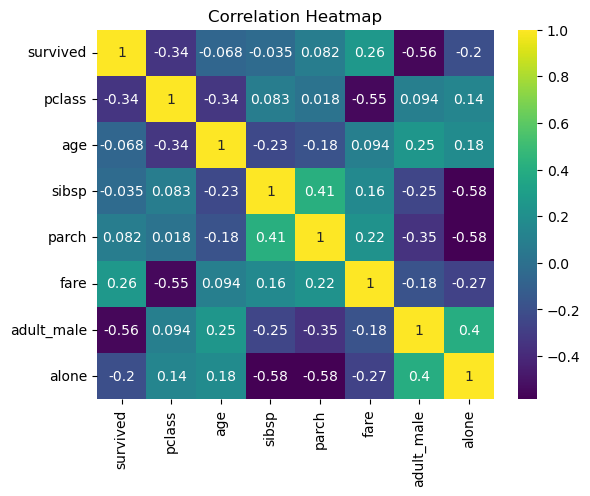

In [14]:
corr = df8.corr(numeric_only=True)

sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

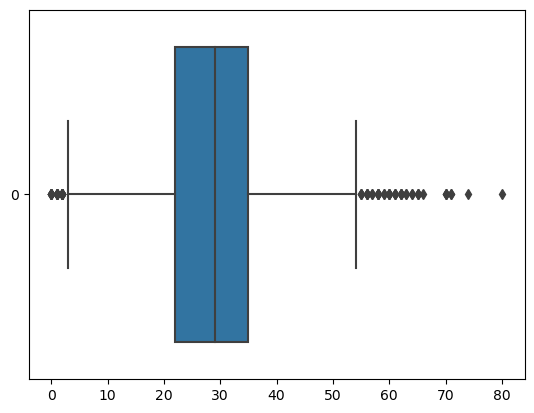

In [15]:
sns.boxplot(df8['age'],orient='h')

<Axes: >

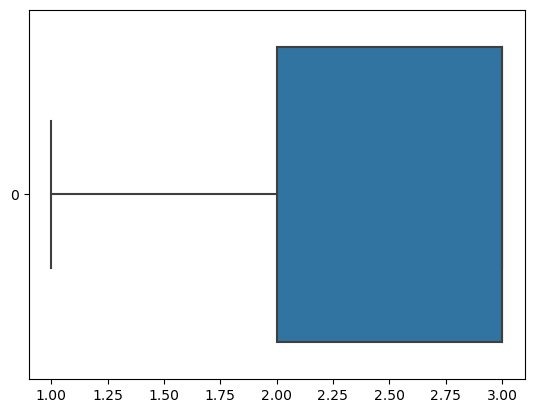

In [16]:
sns.boxplot(df8['pclass'],orient='h')

<Axes: xlabel='fare', ylabel='Count'>

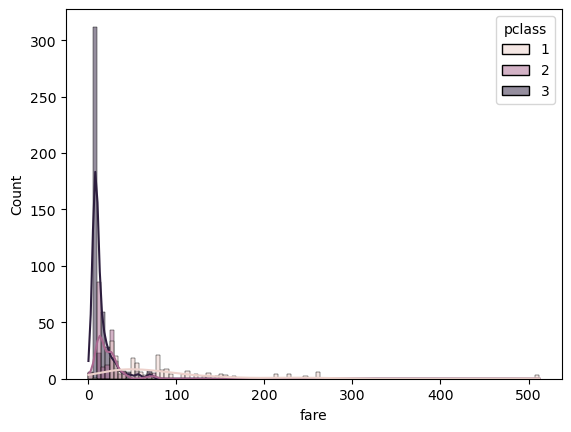

In [17]:
sns.histplot(data=df8, x="fare", hue="pclass", kde=True)

<Axes: xlabel='fare', ylabel='Count'>

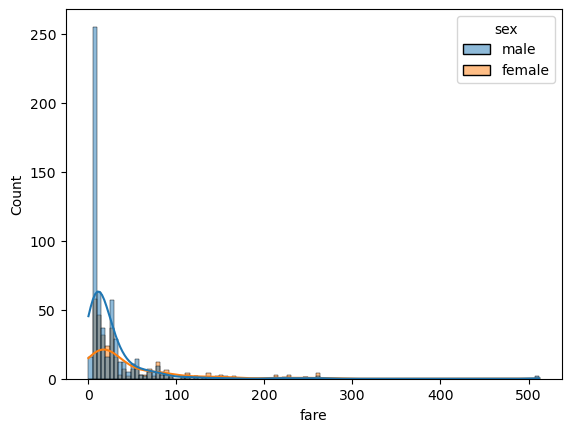

In [18]:
sns.histplot(data=df8, x="fare", hue="sex", kde=True)
